# Example 01: General Use of XGBoostClassifier

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slickml/slick-ml/blob/master/examples/classification.ipynb)

### Google Colab Configuration

In [1]:
# !git clone https://github.com/slickml/slick-ml.git
# %cd slick-ml
# !pip install -r requirements.txt

### Local Environment Configuration

In [2]:
# Change path to project root
%cd ../..

/home/amirhessam/Documents/GitHub/slick-ml


### Import Python Libraries

In [3]:
%load_ext autoreload

# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
%autoreload
from slickml.classification import XGBoostClassifier

_____
# XGBoostClassifier Docstring

In [5]:
help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification:

class XGBoostClassifier(builtins.object)
 |  XGBoostClassifier(num_boost_round=None, metrics=None, sparse_matrix=False, scale_mean=False, scale_std=False, importance_type=None, params=None)
 |  
 |  XGBoost Classifier.
 |  This is wrapper using XGBoost classifier to train a XGBoost
 |  model with using number of boosting rounds from the inputs. This
 |  function is pretty useful when feature selection is done and you
 |  want to train a model on the whole data and test on a separate
 |  validation set. Main reference is XGBoost Python API:
 |  (https://xgboost.readthedocs.io/en/latest/python/python_api.html)
 |  
 |  Parameters
 |  ----------
 |  num_boost_round: int, optional (default=200)
 |      Number of boosting round to train the model
 |  
 |  metrics: str or tuple[str], optional (default=("auc"))
 |      Metric used for evaluation at cross-validation
 |      using xgboost.cv(). Please note that this is different

## Example

In [6]:
# loading data
df = pd.read_csv("data/clf_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [7]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [9]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0, "silent" : 0}

clf = XGBoostClassifier(num_boost_round=333,
                        metrics=("logloss"),
                        params=params)
clf.fit(X_train, y_train)

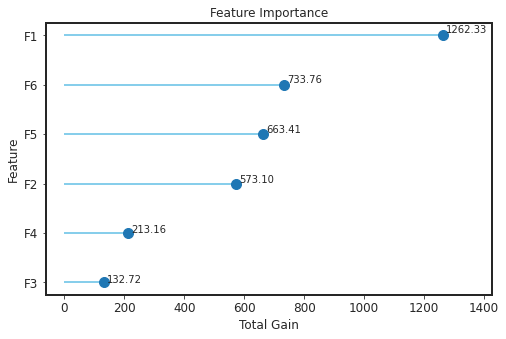

In [10]:
clf.plot_feature_importance()

In [11]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.73965067, 0.5696501 , 0.99523526, 0.9484255 , 0.8447806 ,
       0.82250917, 0.6434073 , 0.94061166, 0.98938864, 0.9988084 ],
      dtype=float32)

In [12]:
# pred class (or clf.y_pred_)
# threshold can be set 
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

[1, 0, 1, 1, 1, 1, 0, 1, 1, 1]

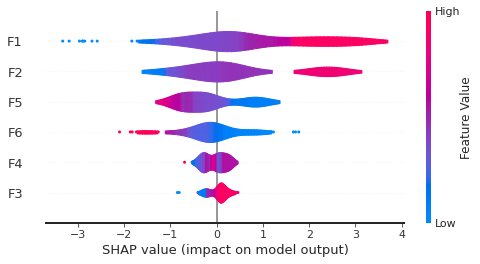

In [13]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

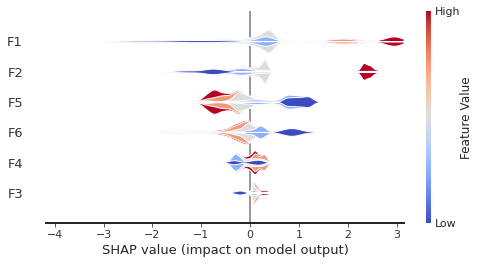

In [14]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(plot_type="layered_violin", validation=False, layered_violin_max_num_bins=5)

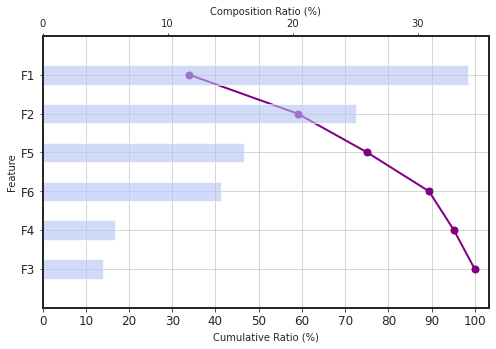

In [15]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [16]:
clf.shap_values_test_[:10]

array([[-1.29101670e+00, -7.59483695e-01,  4.23069239e-01,
         7.15033263e-02,  8.11926782e-01,  1.83317453e-01],
       [ 2.80811101e-01, -7.84179568e-01, -3.91910583e-01,
        -7.42497072e-02, -2.15765968e-01, -1.39118791e-01],
       [ 2.23853612e+00,  2.24254704e+00,  5.89059219e-02,
        -1.92948282e-02, -6.92405522e-01, -9.13755521e-02],
       [ 1.97109222e+00,  2.62834191e-01,  8.69086683e-02,
         2.59986520e-01, -7.12282360e-01, -5.61602592e-01],
       [ 2.24647950e-02, -1.39900184e+00, -4.01935488e-01,
        -9.58486274e-02,  7.84132004e-01,  1.17958856e+00],
       [ 4.06535149e-01, -5.99463470e-04, -2.79712349e-01,
         5.79649955e-02, -1.13711789e-01, -1.41872466e-01],
       [ 3.46254379e-01, -1.08612394e+00,  1.58513725e-01,
         6.82047531e-02, -2.86880642e-01, -2.14622274e-01],
       [ 4.13488388e-01,  1.02422154e+00,  5.96283525e-02,
         5.66690862e-02, -2.76417404e-01, -1.19996436e-01],
       [ 3.53629142e-01,  2.50538158e+00,  5.481

In [17]:
clf.shap_values_train_[:10]

array([[ 1.8890705 ,  2.5171251 , -0.15341438, -0.32906467, -0.78498584,
        -0.3744133 ],
       [ 0.3248044 , -0.2342411 ,  0.04329606,  0.23779924, -0.27085415,
        -0.28651807],
       [ 0.27552384, -1.3393304 , -0.4149736 ,  0.03477486,  0.1096679 ,
         0.14510901],
       [ 2.8261237 ,  2.386949  ,  0.05342117, -0.19627506, -0.03355521,
         0.02238344],
       [ 2.8193345 ,  0.34072563,  0.07263777,  0.17394564, -0.25422522,
        -1.3115385 ],
       [ 1.8913594 ,  2.5171251 , -0.1045079 , -0.24317099, -0.7901514 ,
        -0.42828214],
       [ 1.9564734 ,  0.9576397 ,  0.05829946, -0.24200746, -0.46703762,
        -0.19142887],
       [ 0.29071796,  0.11359535,  0.23424551, -0.12817226, -0.22862864,
         1.0447849 ],
       [ 0.10406707, -0.04654092,  0.06785324,  0.04517091,  0.9123624 ,
         0.08266833],
       [ 0.18870184, -1.4113625 ,  0.15851372,  0.12719016, -0.2572527 ,
        -0.25356317]], dtype=float32)

In [18]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1262.331832
1,F6,733.761238
2,F5,663.409492
3,F2,573.096915
4,F4,213.159127
5,F3,132.719380


In [19]:
clf.model_